<a href="https://colab.research.google.com/github/PetchMa/DeepSearch/blob/master/SETI_CNNLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Seti Version 1**
*Authour Peter Ma : peterxiangyuanma@gmail.com*

## ***Abstract***

*The purpose of this notebook is to prove that Deep Convolution Neural Net works (DCNN's) can effectively extract intelligent features from complex communication systems generated by humans and animals. By applying a simple 1-d convolution on a compressed (factor = 86%) dataset of music, songs, conversations and animal recordings we were able to train a neural network that can discern between intelligent signals and non-intelligent sounds. Training time ~ 5 minutes (5 epoch)*

________________________________________________________________________________


# ***Intelligence Method***
There are two main methods used @ SETI to search for intelligence. One involves technological intelligence. The second filter involves communication sophistication. 

### ***Technology Filter***

This is the traditional method of intelligence search. The assumption is that the universe cannot naturally create narrow band radio waves. The narrowest range detected in the universe at 1420MHz (which is equal to 300 turns on the radio). Technology such as radio stations and transmiters cann produce narrow band radiowaves ranging 0.3 MHz–3.4 MHz.

### ***Communication Filter***

This method of filtering intelligence involves information theory and the k-means algorithm. Let H be the information recieved. K would thus denote the symbol space of H. 
The K-Means algorithm will spatially cluster K groups data based on the hyper-parameter K. Then the data will be filtered and labeled by a human based on k different sounds. The symbol frequncy is ploted on a log_10 scale. A line of best fit is drawn and if the slope of the trend line is close to -1 then the communication system is believed to be intelligent. This is based on Zipf's Law.

### ***Artifical Intelligence Filter***

Working with the communication filter, the AI filter will work in tandem with the original method and act as an initial filter that is faster and easier to operate. The idea here is to use this to gather candidate signals which can later be processed by a human. 

This notebook contains one working example.

________________________________________________________________________________

## Table of Content

1. Preliminary  
2. [Data Input](https://colab.research.google.com/drive/1D_8sxDG5F_ezPq7DUlo2mPcnE2SR3sUx#scrollTo=8lvhZGyPiZFw&line=3&uniqifier=1)
3. [Data restructure and Randomization](https://colab.research.google.com/drive/1D_8sxDG5F_ezPq7DUlo2mPcnE2SR3sUx#scrollTo=8lvhZGyPiZFw&line=3&uniqifier=1)
4. [Model Creation](https://colab.research.google.com/drive/1D_8sxDG5F_ezPq7DUlo2mPcnE2SR3sUx#scrollTo=8lvhZGyPiZFw&line=3&uniqifier=1)
5. [Model Train ](https://colab.research.google.com/drive/1D_8sxDG5F_ezPq7DUlo2mPcnE2SR3sUx#scrollTo=8lvhZGyPiZFw&line=3&uniqifier=1)
6. [Model Test and Evaluate ](https://colab.research.google.com/drive/1D_8sxDG5F_ezPq7DUlo2mPcnE2SR3sUx#scrollTo=8lvhZGyPiZFw&line=3&uniqifier=1)



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
!apt install ffmpeg
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!pip install pydub
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
!pip install h5py
# !unzip '/content/drive/My Drive/Deeplearning/Information/fake_wav/fake.zip' -d '/content/drive/My Drive/Deeplearning/Information/fake_wav'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
--2019-12-11 03:37:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.51.119, 52.204.223.154, 35.170.135.225, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.51.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  62.2MB/s    in 0.2s    

2019-12-11 03:37:37 (62.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok     

In [0]:
import tensorflow as tf 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, ConvLSTM2D
from keras.layers.core import Activation, Flatten
import matplotlib.pyplot as plt
from keras.optimizers import SGD,RMSprop,adam
from keras.models import load_model
from sklearn.utils import shuffle
from keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import os, os.path
import numpy as np
import tempfile
import pydub
import scipy.io.wavfile
from keras.layers import Reshape
from keras import losses
from keras.layers.advanced_activations import LeakyReLU
from pydub import AudioSegment
from scipy.io import wavfile
from keras.layers import Input, LSTM, MaxPooling1D, Conv1D
from keras.models import Model
from keras import backend as K
from keras.layers.convolutional import Convolution1D
from keras.layers import  Conv2D, MaxPool3D, MaxPooling3D, TimeDistributed, Embedding 
from keras.layers import BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
# https://keras.io/examples/imdb_cnn_lstm/
def read_mp3(file_path, rate,  as_float = False):
    path, ext = os.path.splitext(file_path)
    assert ext=='.wav'
    mp3 = pydub.AudioSegment.from_file(file_path, format="wav")
    mp3 = mp3.set_frame_rate(rate)
    _, path = tempfile.mkstemp()
    mp3.export(path, format="wav")
    rate, data = scipy.io.wavfile.read(path)
    os.remove(path)
    if as_float:
        data = data/(2**15)
    return data

In [6]:
file_name = '/content/drive/My Drive/Deeplearning/Information/Train_wav'
# Searches for all files
path, dirs, files = next(os.walk(file_name))
# Finds the number of files. 
file_count = len(files)
print('total num of files: ' + str(file_count))

total num of files: 401


In [7]:
folder = '/content/drive/My Drive/Deeplearning/Information/Train_wav'
rate = 441
time_seconds = 30
length_rate = rate*time_seconds
file_count = file_count-1
print(file_count)
dataset = np.zeros((file_count, length_rate,2), dtype=float)
for i in range(0,file_count):
  if i%10==0:
    print(str(i)+" files have been loaded")
  name = folder+'/'+str(i+1)+'.wav'
  dataset[i][:][:] = read_mp3(name, rate, True)
print("Tensor shape: "+ str(dataset.shape))

400
0 files have been loaded
10 files have been loaded
20 files have been loaded
30 files have been loaded
40 files have been loaded
50 files have been loaded
60 files have been loaded
70 files have been loaded
80 files have been loaded
90 files have been loaded
100 files have been loaded
110 files have been loaded
120 files have been loaded
130 files have been loaded
140 files have been loaded
150 files have been loaded
160 files have been loaded
170 files have been loaded
180 files have been loaded
190 files have been loaded
200 files have been loaded
210 files have been loaded
220 files have been loaded
230 files have been loaded
240 files have been loaded
250 files have been loaded
260 files have been loaded
270 files have been loaded
280 files have been loaded
290 files have been loaded
300 files have been loaded
310 files have been loaded
320 files have been loaded
330 files have been loaded
340 files have been loaded
350 files have been loaded
360 files have been loaded
370 file

In [8]:
folder = '/content/drive/My Drive/Deeplearning/Information/fake_wav'
file_name = '/content/drive/My Drive/Deeplearning/Information/fake_wav'
# Searches for all files
path, dirs, files = next(os.walk(file_name))
# Finds the number of files. 
file_count = len(files)
print('total num of files:' + str(file_count))
file_count = file_count -1
fake = np.zeros((file_count, length_rate ,2), dtype=float)
for i in range(0,file_count):
  if i%10==0:
    print(str(i)+" files have been loaded")
  fake[i][:][:] = read_mp3(folder+'/'+str(i+1)+'.wav', rate, True)
fake_add = np.random.rand(200, length_rate,2)
fake = np.concatenate((fake, fake_add))
print("Tensor shape: "+ str(fake.shape))

total num of files:720
0 files have been loaded
10 files have been loaded
20 files have been loaded
30 files have been loaded
40 files have been loaded
50 files have been loaded
60 files have been loaded
70 files have been loaded
80 files have been loaded
90 files have been loaded
100 files have been loaded
110 files have been loaded
120 files have been loaded
130 files have been loaded
140 files have been loaded
150 files have been loaded
160 files have been loaded
170 files have been loaded
180 files have been loaded
190 files have been loaded
200 files have been loaded
210 files have been loaded
220 files have been loaded
230 files have been loaded
240 files have been loaded
250 files have been loaded
260 files have been loaded
270 files have been loaded
280 files have been loaded
290 files have been loaded
300 files have been loaded
310 files have been loaded
320 files have been loaded
330 files have been loaded
340 files have been loaded
350 files have been loaded
360 files have b

In [9]:
labeltrue = np.concatenate((np.ones((dataset.shape[0],1),dtype='int64'),np.zeros((dataset.shape[0],1),dtype='int64')), axis=1)
labelfalse = np.concatenate((np.zeros((fake.shape[0],1),dtype='int64'),np.ones((fake.shape[0],1),dtype='int64')), axis=1)
label = np.concatenate((labeltrue, labelfalse))
dataset = np.concatenate((dataset, fake))
print(label.shape)
print(dataset.shape)
print(label[398,:])
print(label[400,:])

(1319, 2)
(1319, 13230, 2)
[1 0]
[0 1]


In [10]:
dataset,label = shuffle(dataset,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2)
print(X_train.shape)

(1055, 13230, 2)


In [11]:
  LR = LeakyReLU(0.3)
  LR.__name__ = 'relu'

In [27]:
# https://stackoverflow.com/questions/46516774/drawing-a-diagram-to-illustrate-this-cnnlstm-network
input_shape = dataset[0].shape
kernel = 30
epoch = 30
learning_rate = 0.1

model = Sequential()

model.add(Convolution1D(32, kernel_size = kernel, strides=1, padding='same', input_shape=input_shape ))
model.add(LR)
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, kernel_size = kernel, strides=1, padding='same'))
model.add(LR)
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))

model.add(Convolution1D(128, kernel_size = kernel, strides=1, padding='same'))
model.add(LR)
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))

model.add(Convolution1D(256, kernel_size = kernel, strides=1, padding='same'))
model.add(LR)
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))


# model.add(Embedding(10000, 64, input_length=(826, 256)))

# model.add(TimeDistributed(Flatten()))



model.add(CuDNNLSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(CuDNNLSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(CuDNNLSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(CuDNNLSTM(256))
model.add(Dropout(0.5))


model.add(Dense(13230, activation=LR))
model.add(Dropout(0.5))
model.add(Dense(64, activation=LR))
model.add(Dropout(0.5))
model.add(Dense(2 , activation='sigmoid'))

model.summary()

sgd= SGD(lr=learning_rate, decay = learning_rate/epoch, momentum=0.0, nesterov=False)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 13230, 32)         1952      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 6615, 32)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 6615, 32)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 6615, 64)          61504     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 3307, 64)          0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 3307, 64)         

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [28]:
batch_size =4
# es_callback = EarlyStopping(monitor='val_loss', mode='min')
mc = ModelCheckpoint('model_1.h5', monitor='val_loss', mode='min', save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, epochs=8, validation_data=(X_test, y_test), callbacks=[mc])

from keras.models import load_model
# saved_model = load_model('best_model.h5')

Train on 671 samples, validate on 168 samples
Epoch 1/8
671/671 [==============================] - 31s 47ms/step - loss: 0.5812 - acc: 0.6557 - val_loss: 0.5302 - val_acc: 0.7202
Epoch 2/8
671/671 [==============================] - 28s 41ms/step - loss: 0.5213 - acc: 0.7146 - val_loss: 0.4980 - val_acc: 0.7202
Epoch 3/8
671/671 [==============================] - 28s 41ms/step - loss: 0.5125 - acc: 0.7116 - val_loss: 0.4977 - val_acc: 0.7202
Epoch 4/8
671/671 [==============================] - 28s 41ms/step - loss: 0.4823 - acc: 0.7437 - val_loss: 0.5076 - val_acc: 0.7202
Epoch 5/8
671/671 [==============================] - 28s 41ms/step - loss: 0.5105 - acc: 0.7139 - val_loss: 0.4966 - val_acc: 0.7202
Epoch 6/8
671/671 [==============================] - 28s 41ms/step - loss: 0.4390 - acc: 0.7772 - val_loss: 0.2032 - val_acc: 0.9464
Epoch 7/8
671/671 [==============================] - 28s 41ms/step - loss: 0.2505 - acc: 0.9001 - val_loss: 0.4992 - val_acc: 0.7202
Epoch 8/8
671/671 [====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


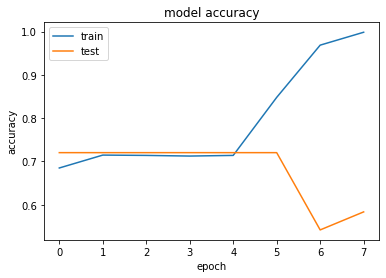

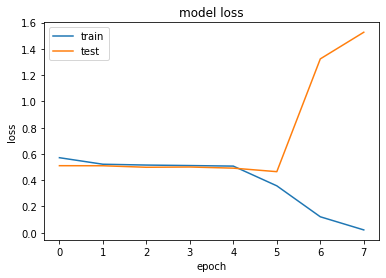

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [22]:
saved_model = load_model('model_1.h5')
randomnoise = np.random.rand(3,length_rate,2)

print(model.predict(randomnoise))

[[2.1144748e-04 9.9972737e-01]
 [1.7979741e-04 9.9976635e-01]
 [1.6972960e-04 9.9977869e-01]]


In [23]:
folder = '/content/drive/My Drive/Deeplearning/Information/Test_wav'
file_name = '/content/drive/My Drive/Deeplearning/Information/Test_wav'
# Searches for all files
path, dirs, files = next(os.walk(file_name))
# Finds the number of files. 
file_count = len(files)
print('total num of files:' + str(file_count))
file_count = file_count -1
test = np.zeros((file_count, length_rate ,2), dtype=float)
for i in range(0,file_count):
  if i%500==0:
    print(str(i)+" files have been loaded")
  test[i][:][:] = read_mp3(folder+'/'+str(i+1)+'.wav', rate, True)
print(model.predict(test))

total num of files:5
0 files have been loaded
[[9.992124e-01 9.253025e-04]
 [9.991933e-01 9.467900e-04]
 [9.992091e-01 9.287894e-04]
 [9.992124e-01 9.251833e-04]]
